In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
df = pd.read_csv("Zomato data.csv")
print(df.head())

Error: 'Zomato data.csv' not found in the current directory or /content/. Please provide the correct path.
Data loaded successfully.


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [13]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [22]:
#convert the data type of column rate
def handlerate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)
df['rate'] = df['rate'].apply(handlerate)
print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [24]:
#type of restaurant
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


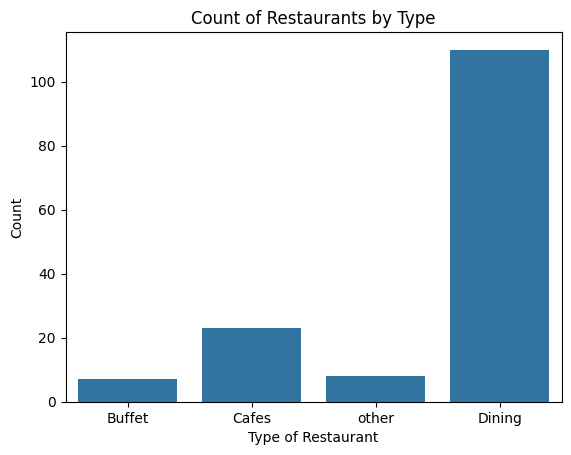

In [25]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurant')
plt.ylabel('Count')
plt.title('Count of Restaurants by Type')
plt.show()

**Insight from above**

People dining are more than 100

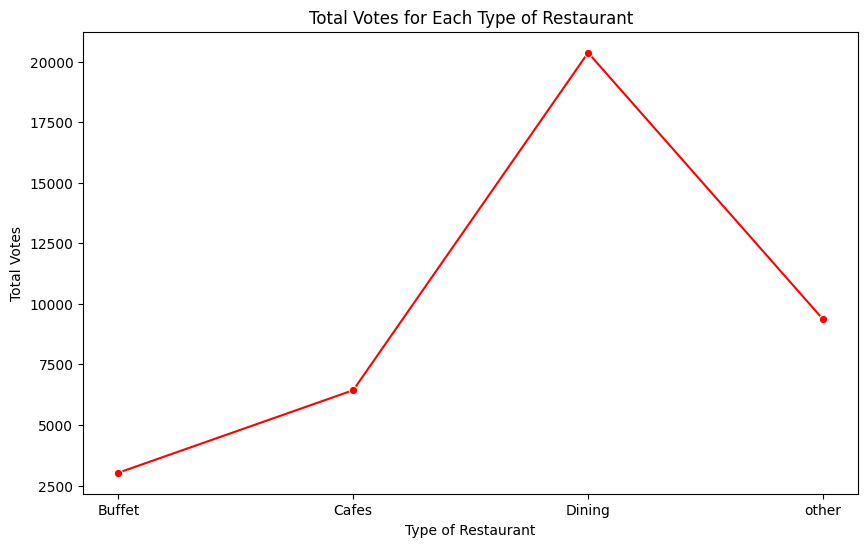

In [34]:
#which type of restaurant got how much votes

grouped_data = df.groupby('listed_in(type)')['votes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='listed_in(type)', y='votes', data=grouped_data, marker='o',c = 'r')
plt.xlabel('Type of Restaurant')
plt.ylabel('Total Votes')
plt.title('Total Votes for Each Type of Restaurant')
plt.show()

**Insights**: Dining restaurants has recieved maximum votes

In [35]:
#which type of rating is done maximum
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


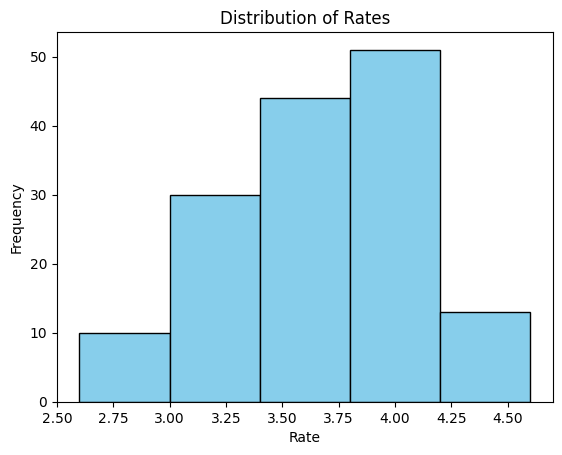

In [39]:
plt.hist(df['rate'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Rates')
plt.show()

**Insights**: Majority restaurants recieved from 3.5 to 4

In [40]:
#average spending of each order for couples
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Count')

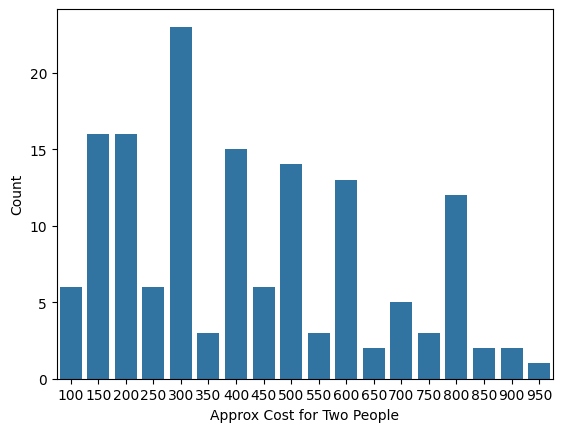

In [41]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel('Approx Cost for Two People')
plt.ylabel('Count')


**Insights**: Couples spend Rs.300 maximum, tehn 150 and 200

In [42]:
#which type of mode recieves maximum rating
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='rate', ylabel='count'>

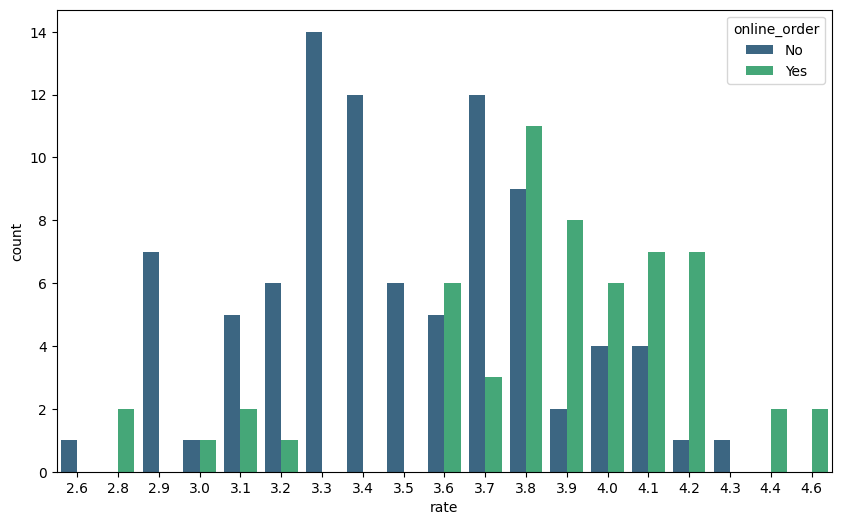

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rate', hue='online_order', data=df, palette='viridis')

**Insights:** Online ratings are good than offline

In [44]:
#Which type of restaurant recieved more offline orders
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


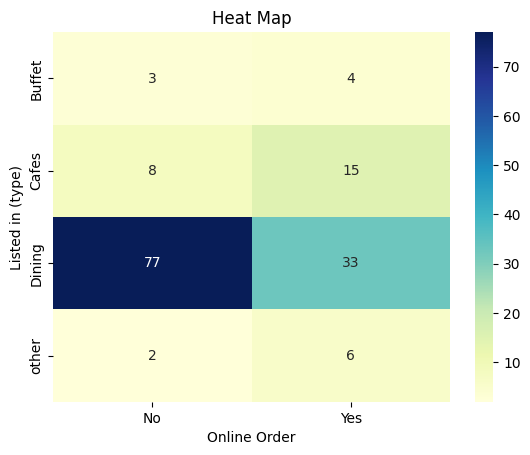

In [46]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', fill_value=0, aggfunc='size')
sns.heatmap(pivot_table,annot= True, cmap ="YlGnBu", fmt="d")
plt.title("Heat Map")
plt.xlabel("Online Order")
plt.ylabel("Listed in (type)")
plt.show()

**Insights**: Dining offline orders are more
Cafes online order are more